# Tanzanian Water Wells Project

## Overview

A one-paragraph overview of the project, including the business problem, data, methods, results and recommendations.

## Business Problem

- Predict the condition of the water wells in Tanzania

### End Users:

- Governments, NGOs

### True business problem:

- Create a model that can, if given data of the water wells , predict if the water well needs repair. 

### Context:

- **False positive** in this context: Predicts that an water well doesn't need repair but it actually does.
    - **Outcome**: The people can't get water from the well.
    
- **False negative** in this context: Predicts that an water well needs repair but it actually doesn't.

    - **Outcome**: Waste money/human resources on checking the well.

### Evaluation 

Which metric (of the ones we've explore so far) would make sense to primarily use as we evaluate our models?

- **Accuracy**
- **Precision**
- Recall
- F1-Score

We can focus on accuracy for ease of use, but should also be maximizing our Precision Score and minimizing False Positives, because false positives are more costly than false negatives.

## Data Understanding

Describe the data being used for this project.

Questions to consider:

- Where did the data come from, and how do they relate to the data analysis questions?
- What do the data represent? Who is in the sample and what variables are included?
- What is the target variable?
- What are the properties of the variables you intend to use?

### Training Set Values Exploration

In [4]:
# import pandas
import pandas as pd
# read training data values
X = pd.read_csv("../../data/Pump_it_Up_Data_Mining_the_Water_Table_-_Training_set_values.csv", index_col='id')

In [5]:
X

,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
id,,,,,,,,,,,,,,,,,,,,,
69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60739,10.0,2013-05-03,Germany Republi,1210,CES,37.169807,-3.253847,Area Three Namba 27,0,Pangani,...,per bucket,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
27263,4700.0,2011-05-07,Cefa-njombe,1212,Cefa,35.249991,-9.070629,Kwa Yahona Kuvala,0,Rufiji,...,annually,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe
37057,0.0,2011-04-11,NaN,0,NaN,34.017087,-8.750434,Mashine,0,Rufiji,...,monthly,fluoride,fluoride,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump


In [6]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 69572 to 26348
Data columns (total 39 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   amount_tsh             59400 non-null  float64
 1   date_recorded          59400 non-null  object 
 2   funder                 55765 non-null  object 
 3   gps_height             59400 non-null  int64  
 4   installer              55745 non-null  object 
 5   longitude              59400 non-null  float64
 6   latitude               59400 non-null  float64
 7   wpt_name               59400 non-null  object 
 8   num_private            59400 non-null  int64  
 9   basin                  59400 non-null  object 
 10  subvillage             59029 non-null  object 
 11  region                 59400 non-null  object 
 12  region_code            59400 non-null  int64  
 13  district_code          59400 non-null  int64  
 14  lga                    59400 non-null  object 
 15

The data set is pretty large and there are not that many null values

### y_train Exploration

In [7]:
y = pd.read_csv('../../data/Pump_it_Up_Data_Mining_the_Water_Table_-_Training_set_labels.csv', index_col='id')
y

,status_group
id,
69572,functional
8776,functional
34310,functional
67743,non functional
19728,functional
...,...
60739,functional
27263,functional
37057,functional


In [8]:
# convert the dataframe into a series
y = y['status_group']

In [9]:
y.value_counts()

functional                 32259
non functional             22824
functional needs repair     4317
Name: status_group, dtype: int64

## Data Preparation

Describe and justify the process for preparing the data for analysis.

Questions to consider:

- Were there variables you dropped or created?
- How did you address missing values or outliers?
- Why are these choices appropriate given the data and the business problem?
- Can you pipeline your preparation steps to use them consistently in the modeling process?

### Train Test Split

We are not getting the target for our testing data so we are going to treat our training data as if that's all the data we got. So we'll split it into training data, validation data and a holdout set that we will only look at in the end.

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_holdout, y_train, y_holdout = train_test_split(X, y, random_state=42, test_size = .1)

In [11]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, random_state=42)

### Target Preprocessing

Our target has three unique values: functional, non functional and functional needs repair. It doesn't make much difference if the water well is non functional or functional needs repair because it requires attention regardless. The functional needs repair ones can break down at anytime and as a result, people who depend on the well to survive will suffer. For these reasons, we decide to simplify the problem into a binary prediction problem with 0 representing wells that needs repair and 1 representing wells that doesn't need repair (aka functional).

In [12]:
# set up a dictionary for mapping
map_dict = {"functional": 1, "non functional": 0, "functional needs repair": 0}

In [13]:
y_train = y_train.map(map_dict)

In [14]:
y_val = y_val.map(map_dict)

In [15]:
y_holdout = y_holdout.map(map_dict)

### Imputing Nulls and Encoding Categorical Values

In [16]:
# imports for preprocessing
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
import category_encoders as ce

In [17]:
# Seperate columns into three categories:
# numeric columns, OneHotEncoder approriate columns and frequency encoded appropriate columns
num_cols = []
ohe_cols = []
freq_cols = []

# we pick a maximum unique value of 3 for columns to be onehotencoded for simplicity reasons

for c in X.columns:
    if X[c].dtype in ['float64', 'int64']:
        num_cols.append(c)
    elif X[c].nunique() < 3:
        ohe_cols.append(c)
    else:
        freq_cols.append(c)

In [18]:
# see what these columns are
print(f'these are the numeric columns: {num_cols}')
print('')
print(f'these are the OHE columns:{ohe_cols}')
print('')
print(f'these are the frequency encoded columns:{freq_cols}')

these are the numeric columns: ['amount_tsh', 'gps_height', 'longitude', 'latitude', 'num_private', 'region_code', 'district_code', 'population', 'construction_year']

these are the OHE columns:['public_meeting', 'recorded_by', 'permit']

these are the frequency encoded columns:['date_recorded', 'funder', 'installer', 'wpt_name', 'basin', 'subvillage', 'region', 'lga', 'ward', 'scheme_management', 'scheme_name', 'extraction_type', 'extraction_type_group', 'extraction_type_class', 'management', 'management_group', 'payment', 'payment_type', 'water_quality', 'quality_group', 'quantity', 'quantity_group', 'source', 'source_type', 'source_class', 'waterpoint_type', 'waterpoint_type_group']


In [19]:
# check which columns have null values that needs imputing
list=[]
for c in range(len(X.isna().any())):
    if X.isna().any()[c] == True:
        list.append(X.isna().any().index[c])
list

['funder',
 'installer',
 'subvillage',
 'public_meeting',
 'scheme_management',
 'scheme_name',
 'permit']

In [20]:
# set up pipeline for preprocessing 
# for numeric columns, we need to scale it
# for unique value <3 columns, we need to one hot encode it
# for unique value >3 columns, we need to frequency encode it
ohe_transformer = Pipeline(steps=[
    ('ohe_imputer', SimpleImputer(strategy='constant', fill_value = 0)),
    ('oh_encoder', OneHotEncoder(handle_unknown='ignore'))
])

freq_transformer = Pipeline(steps=[
    ('freq_encoder', ce.count.CountEncoder(normalize=True, min_group_size=.05)),
    ('freq_imputer', SimpleImputer(strategy='constant', fill_value=0))
])

num_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
    
])

preprocessor = ColumnTransformer(
    transformers=[
        ('ohe', ohe_transformer, ohe_cols),
        ('freq', freq_transformer, freq_cols),
        ('scaler', num_transformer, num_cols)
    ])

preprocessor.fit(X_train)

ColumnTransformer(transformers=[('ohe',
                                 Pipeline(steps=[('ohe_imputer',
                                                  SimpleImputer(fill_value=0,
                                                                strategy='constant')),
                                                 ('oh_encoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['public_meeting', 'recorded_by', 'permit']),
                                ('freq',
                                 Pipeline(steps=[('freq_encoder',
                                                  CountEncoder(combine_min_nan_groups=True,
                                                               min_group_size=0.05,
                                                               normalize=True)),
                                                 ('freq_imputer...
                                  'management_group', 'payment'

## Modeling

Describe and justify the process for analyzing or modeling the data.

Questions to consider:

- How will you analyze the data to arrive at an initial approach?
- How will you iterate on your initial approach to make it better?
- What model type is most appropriate, given the data and the business problem?

In [37]:
# imports for modeling
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import plot_confusion_matrix, plot_roc_curve, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score

In [25]:
# build an evaluation function 
def evaluate(y_true, y_pred):
    from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
    print(f'Accuracy Score: Train {}   Test{accuracy_score(y_true, y_pred)}')
    print(f'Precision Score: {precision_score(y_true, y_pred)}')
    print(f'Recall Score: {recall_score(y_true, y_pred)}')
    print(f'F1 Score:{f1_score(y_true, y_pred)}')
    print(f'ROC_AUC:{roc_auc_score(y_true, y_pred)}')
    print('Confusion Matrix')
    print(confusion_matrix(y_true, y_pred))

### Baseline Understanding

First, we want to see how the baseline model where we predict the majority class everytime does so we know what to compare our score to.

In [32]:
from sklearn.dummy import DummyClassifier

In [35]:
dummy_model = DummyClassifier(strategy="most_frequent")
dummy_model.fit(X_train, y_train)
dummy_model.predict(X_train)
cv_results = cross_val_score(dummy_model, X_train, y_train, cv=5)
cv_results

array([0.54508043, 0.54508043, 0.54508043, 0.54520514, 0.54520514])

Based on our dummy model assuming that all predictions will result in the majority class, we can see the dispersion of results - a little more than half of our waterwells are functioning.

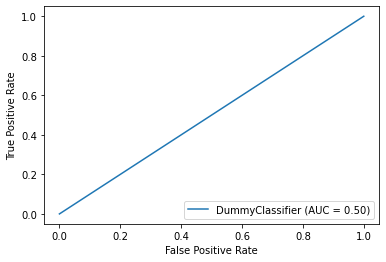

In [38]:
plot_roc_curve(dummy_model,X_train,y_train)

50% - not great results.

In [ ]:
#evaluate(.....)

Since we combined our non-functional and functional needs repair targets, our target data is already pretty balanced. We will need to strengthen our model validation in order to determine what is a real prediction, and what is a result of random chance.

### Logistic Regression Modeling

In [39]:
from sklearn.linear_model import LogisticRegression

In [43]:
# we are using no penalty because 
log_classifier = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LogisticRegression())
])
cross_validate(log_classifier, X_train, y_train, return_train_score=True)

/Users/elylin/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/elylin/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable

{'fit_time': array([1.93362212, 1.85952711, 1.85891986, 1.8801198 , 1.90022612]),
 'score_time': array([0.2499001 , 0.22200274, 0.26625204, 0.21843719, 0.25993085]),
 'test_score': array([0.68424991, 0.68587106, 0.68312757, 0.68275346, 0.68761691]),
 'train_score': array([0.68621399, 0.68440579, 0.68384462, 0.68406285, 0.68521636])}

The model can't find the minimum. Let's try another solver, saga, that can deal with large datasets.

In [44]:
log_classifier = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LogisticRegression(solver='saga'))
])
cross_validate(log_classifier, X_train, y_train, return_train_score=True)

/Users/elylin/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/elylin/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/elylin/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/elylin/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/elylin/opt/an

{'fit_time': array([2.58121276, 2.39640689, 2.52908373, 2.66332102, 2.63510108]),
 'score_time': array([0.20314717, 0.23419023, 0.23571801, 0.20676875, 0.25306797]),
 'test_score': array([0.67265245, 0.67140541, 0.664422  , 0.66529492, 0.67078189]),
 'train_score': array([0.67894999, 0.67536476, 0.67598828, 0.67888764, 0.67773413])}

The model still didn't converge. Logistic regression is not very good at interaction terms which we'd expect in this dataset.

### KNN Modeling

In [21]:
# build a baseline Knn model
Knn_classifier = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', KNeighborsClassifier())
])

In [22]:
#Crossvalidate the Xtrain dataset to generate the accuracy score
#from the sample folds
from sklearn.model_selection import cross_validate
cross_validate(Knn_classifier, X_train, y_train, return_train_score=True)

{'fit_time': array([1.91307521, 2.10658216, 2.10404587, 1.88077116, 2.08006024]),
 'score_time': array([3.48275995, 4.01536894, 4.17867804, 3.23617172, 3.89504886]),
 'test_score': array([0.75134057, 0.74373363, 0.74560419, 0.74759945, 0.75009353]),
 'train_score': array([0.83604564, 0.83822796, 0.83657563, 0.83520389, 0.83464272])}

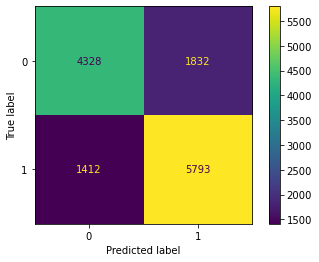

In [24]:
#plot confusion metrics to see our False positive and False negative
Knn_classifier.fit(X_train,y_train)
pred_tr = Knn_classifier.predict(X_train)
pred_te = Knn_classifier.predict(X_val)
plot_confusion_matrix(Knn_classifier,X_val,y_val)

In [26]:
evaluate(y_val,pred_te)

Accuracy Score: 0.7572764683875794
Precision Score: 0.7597377049180328
Recall Score: 0.8040249826509368
F1 Score:0.781254214430209
ROC_AUC:0.7533111926241698
Confusion Matrix
[[4328 1832]
 [1412 5793]]


KNN has good scores, way better than Logistic Regression, but as we add more data to the model, it's going to take more and more time to run. So we are not going to use KNN model. 

### Decision Tree Modeling

In [18]:
# import decision tree classifier
from sklearn.tree import DecisionTreeClassifier 
# set up pipeline for decision tree models
dt = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', DecisionTreeClassifier())])

In [19]:
# baseline decision tree model

cross_validate(dt, X_train, y_train, return_train_score = True)

{'fit_time': array([1.75927472, 1.75242281, 1.77804112, 1.81066132, 1.78334999]),
 'score_time': array([0.2259922 , 0.22940111, 0.23037791, 0.2335248 , 0.20563102]),
 'test_score': array([0.76505799, 0.76680384, 0.76493328, 0.76181569, 0.7621898 ]),
 'train_score': array([0.99947001, 0.99950118, 0.99956354, 0.99962589, 0.99950118])}

- The score is way better on the training set than the test set so the model is definitely overfitted, which is expected for an untuned decision tree model. 

#### Improve Decision Tree by Gridsearching

In [20]:
from sklearn.model_selection import GridSearchCV

In [21]:
# correct for overfitting by limiting max depth and minimum samples split
dt_grid_params = {'classifier__max_depth':[1,5,10], 'classifier__min_samples_split':[2,10,100]}

In [22]:
# Gridsearch for best precision score because that's what we want to maximize according to our business problem
dt_grid = GridSearchCV(dt, dt_grid_params, scoring = 'precision')
dt_output = dt_grid.fit(X_train, y_train)

In [23]:
# See the gridsearch result
dt_output.best_params_

{'classifier__max_depth': 10, 'classifier__min_samples_split': 2}

In [24]:
dt_best_model = dt_output.best_estimator_

In [25]:
# test it on our validation set
dt_preds = dt_best_model.predict(X_val)

In [27]:
evaluate(y_val, dt_preds)

Accuracy Score: 0.7658062102506547
Precision Score: 0.7577482605945604
Recall Score: 0.8313671061762665
F1 Score:0.7928524156187955
ROC_AUC:0.7602452413998215
Confusion Matrix
[[4245 1915]
 [1215 5990]]


#### Random Forest

In [38]:
from sklearn.ensemble import RandomForestClassifier

In [39]:
# setting up pipeline for random forest models
rfc = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier())])

In [41]:
# set up parameter grid
rfc_grid_params = {'classifier__n_estimators': [1,10,100], 'classifier__max_depth':[1,5,10], 'classifier__min_samples_split':[2,10,100], 'classifier__max_features': ['sqrt','log2', None], 'classifier__max_samples': [0.1,0.3,0.5]}

In [42]:
# Gridsearch for best precision score 
rfc_grid = GridSearchCV(rfc, rfc_grid_params, scoring = 'precision')
rfc_output = rfc_grid.fit(X_train, y_train)

In [43]:
# See the gridsearch result
rfc_output.best_params_

{'classifier__max_depth': 10,
 'classifier__max_features': None,
 'classifier__max_samples': 0.5,
 'classifier__min_samples_split': 2,
 'classifier__n_estimators': 100}

In [44]:
rfc_best_model = rfc_output.best_estimator_

In [45]:
# test it on our validation set
rfc_preds = rfc_best_model.predict(X_val)

In [46]:
evaluate(y_val, rfc_preds)

Accuracy Score: 0.788627010849233
Precision Score: 0.7493169398907104
Recall Score: 0.9135322692574601
F1 Score:0.8233160297704673
ROC_AUC:0.7780323683949638
Confusion Matrix
[[3958 2202]
 [ 623 6582]]


#### Catboost

In [1]:
conda install catboost

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.10.1
  latest version: 4.10.3

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /Users/elylin/opt/anaconda3/envs/learn-env

  added / updated specs:
    - catboost


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2021.9.30  |       hecd8cb5_1         116 KB
    catboost-0.26.1            |   py38hecd8cb5_0         8.2 MB
    certifi-2021.10.8          |   py38hecd8cb5_0         151 KB
    openssl-1.1.1l             |       h9ed2024_0         2.2 MB
    ------------------------------------------------------------
                                           Total:        10.6 MB

The following NEW packages will be INSTALLED:

  catboost           pkgs/main/osx-64::catboost-0.26.1-py38hecd8cb5_0

The fol

In [29]:
from catboost import CatBoostClassifier

In [30]:
cbc = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', CatBoostClassifier())])

In [31]:
cbc.fit(X_train, y_train)

Learning rate set to 0.049826
0:	learn: 0.6746513	total: 69.8ms	remaining: 1m 9s
1:	learn: 0.6587996	total: 81.9ms	remaining: 40.9s
2:	learn: 0.6448416	total: 93.8ms	remaining: 31.2s
3:	learn: 0.6329566	total: 104ms	remaining: 25.8s
4:	learn: 0.6221820	total: 113ms	remaining: 22.6s
5:	learn: 0.6146704	total: 123ms	remaining: 20.4s
6:	learn: 0.6059508	total: 133ms	remaining: 18.9s
7:	learn: 0.5994655	total: 143ms	remaining: 17.7s
8:	learn: 0.5917500	total: 152ms	remaining: 16.8s
9:	learn: 0.5855488	total: 162ms	remaining: 16s
10:	learn: 0.5798882	total: 171ms	remaining: 15.4s
11:	learn: 0.5753365	total: 181ms	remaining: 14.9s
12:	learn: 0.5709314	total: 191ms	remaining: 14.5s
13:	learn: 0.5662230	total: 201ms	remaining: 14.2s
14:	learn: 0.5624279	total: 214ms	remaining: 14.1s
15:	learn: 0.5589481	total: 225ms	remaining: 13.9s
16:	learn: 0.5561165	total: 235ms	remaining: 13.6s
17:	learn: 0.5532814	total: 245ms	remaining: 13.4s
18:	learn: 0.5505475	total: 254ms	remaining: 13.1s
19:	learn:

176:	learn: 0.4469636	total: 1.81s	remaining: 8.42s
177:	learn: 0.4467663	total: 1.82s	remaining: 8.41s
178:	learn: 0.4466329	total: 1.83s	remaining: 8.4s
179:	learn: 0.4465261	total: 1.84s	remaining: 8.39s
180:	learn: 0.4461663	total: 1.85s	remaining: 8.38s
181:	learn: 0.4458380	total: 1.86s	remaining: 8.37s
182:	learn: 0.4456233	total: 1.87s	remaining: 8.36s
183:	learn: 0.4453274	total: 1.88s	remaining: 8.35s
184:	learn: 0.4451600	total: 1.89s	remaining: 8.34s
185:	learn: 0.4447677	total: 1.9s	remaining: 8.32s
186:	learn: 0.4444229	total: 1.91s	remaining: 8.32s
187:	learn: 0.4441493	total: 1.92s	remaining: 8.31s
188:	learn: 0.4439685	total: 1.93s	remaining: 8.29s
189:	learn: 0.4437844	total: 1.94s	remaining: 8.29s
190:	learn: 0.4435461	total: 1.95s	remaining: 8.27s
191:	learn: 0.4432581	total: 1.96s	remaining: 8.26s
192:	learn: 0.4431308	total: 1.97s	remaining: 8.25s
193:	learn: 0.4429332	total: 1.98s	remaining: 8.23s
194:	learn: 0.4427714	total: 1.99s	remaining: 8.23s
195:	learn: 0.

352:	learn: 0.4119074	total: 3.64s	remaining: 6.68s
353:	learn: 0.4117079	total: 3.66s	remaining: 6.68s
354:	learn: 0.4115599	total: 3.67s	remaining: 6.67s
355:	learn: 0.4114605	total: 3.68s	remaining: 6.67s
356:	learn: 0.4113299	total: 3.69s	remaining: 6.65s
357:	learn: 0.4111499	total: 3.7s	remaining: 6.64s
358:	learn: 0.4109868	total: 3.71s	remaining: 6.63s
359:	learn: 0.4108338	total: 3.72s	remaining: 6.62s
360:	learn: 0.4107211	total: 3.73s	remaining: 6.6s
361:	learn: 0.4106146	total: 3.74s	remaining: 6.59s
362:	learn: 0.4104552	total: 3.75s	remaining: 6.58s
363:	learn: 0.4102664	total: 3.76s	remaining: 6.57s
364:	learn: 0.4100270	total: 3.77s	remaining: 6.56s
365:	learn: 0.4098520	total: 3.78s	remaining: 6.55s
366:	learn: 0.4097339	total: 3.79s	remaining: 6.54s
367:	learn: 0.4095815	total: 3.8s	remaining: 6.53s
368:	learn: 0.4095783	total: 3.81s	remaining: 6.52s
369:	learn: 0.4094540	total: 3.82s	remaining: 6.51s
370:	learn: 0.4093367	total: 3.83s	remaining: 6.5s
371:	learn: 0.40

511:	learn: 0.3916117	total: 5.24s	remaining: 5s
512:	learn: 0.3915180	total: 5.25s	remaining: 4.99s
513:	learn: 0.3913748	total: 5.27s	remaining: 4.98s
514:	learn: 0.3912386	total: 5.28s	remaining: 4.97s
515:	learn: 0.3911367	total: 5.29s	remaining: 4.96s
516:	learn: 0.3909820	total: 5.3s	remaining: 4.95s
517:	learn: 0.3908727	total: 5.31s	remaining: 4.94s
518:	learn: 0.3907963	total: 5.32s	remaining: 4.93s
519:	learn: 0.3906870	total: 5.33s	remaining: 4.92s
520:	learn: 0.3906480	total: 5.34s	remaining: 4.91s
521:	learn: 0.3905161	total: 5.35s	remaining: 4.9s
522:	learn: 0.3904371	total: 5.36s	remaining: 4.89s
523:	learn: 0.3902748	total: 5.37s	remaining: 4.88s
524:	learn: 0.3901998	total: 5.38s	remaining: 4.87s
525:	learn: 0.3901191	total: 5.39s	remaining: 4.86s
526:	learn: 0.3899801	total: 5.4s	remaining: 4.85s
527:	learn: 0.3898735	total: 5.41s	remaining: 4.84s
528:	learn: 0.3898706	total: 5.42s	remaining: 4.83s
529:	learn: 0.3897596	total: 5.43s	remaining: 4.82s
530:	learn: 0.3895

672:	learn: 0.3760021	total: 6.88s	remaining: 3.34s
673:	learn: 0.3759398	total: 6.89s	remaining: 3.33s
674:	learn: 0.3758760	total: 6.9s	remaining: 3.32s
675:	learn: 0.3757863	total: 6.91s	remaining: 3.31s
676:	learn: 0.3757317	total: 6.92s	remaining: 3.3s
677:	learn: 0.3756328	total: 6.93s	remaining: 3.29s
678:	learn: 0.3755601	total: 6.94s	remaining: 3.28s
679:	learn: 0.3755003	total: 6.95s	remaining: 3.27s
680:	learn: 0.3754164	total: 6.96s	remaining: 3.26s
681:	learn: 0.3753142	total: 6.97s	remaining: 3.25s
682:	learn: 0.3752237	total: 6.98s	remaining: 3.24s
683:	learn: 0.3751099	total: 6.99s	remaining: 3.23s
684:	learn: 0.3749913	total: 7.01s	remaining: 3.22s
685:	learn: 0.3749377	total: 7.04s	remaining: 3.22s
686:	learn: 0.3748228	total: 7.06s	remaining: 3.22s
687:	learn: 0.3746986	total: 7.08s	remaining: 3.21s
688:	learn: 0.3745835	total: 7.09s	remaining: 3.2s
689:	learn: 0.3744852	total: 7.11s	remaining: 3.19s
690:	learn: 0.3743656	total: 7.12s	remaining: 3.18s
691:	learn: 0.3

841:	learn: 0.3622504	total: 8.7s	remaining: 1.63s
842:	learn: 0.3622496	total: 8.71s	remaining: 1.62s
843:	learn: 0.3621408	total: 8.72s	remaining: 1.61s
844:	learn: 0.3620997	total: 8.73s	remaining: 1.6s
845:	learn: 0.3620371	total: 8.74s	remaining: 1.59s
846:	learn: 0.3619588	total: 8.75s	remaining: 1.58s
847:	learn: 0.3618819	total: 8.76s	remaining: 1.57s
848:	learn: 0.3617936	total: 8.77s	remaining: 1.56s
849:	learn: 0.3617025	total: 8.78s	remaining: 1.55s
850:	learn: 0.3615911	total: 8.79s	remaining: 1.54s
851:	learn: 0.3615239	total: 8.8s	remaining: 1.53s
852:	learn: 0.3614216	total: 8.81s	remaining: 1.52s
853:	learn: 0.3613366	total: 8.82s	remaining: 1.51s
854:	learn: 0.3612772	total: 8.83s	remaining: 1.5s
855:	learn: 0.3611626	total: 8.84s	remaining: 1.49s
856:	learn: 0.3610952	total: 8.85s	remaining: 1.48s
857:	learn: 0.3610230	total: 8.86s	remaining: 1.47s
858:	learn: 0.3609378	total: 8.87s	remaining: 1.46s
859:	learn: 0.3608762	total: 8.88s	remaining: 1.45s
860:	learn: 0.36

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('ohe',
                                                  Pipeline(steps=[('ohe_imputer',
                                                                   SimpleImputer(fill_value=0,
                                                                                 strategy='constant')),
                                                                  ('oh_encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['public_meeting',
                                                   'recorded_by', 'permit']),
                                                 ('freq',
                                                  Pipeline(steps=[('freq_encoder',
                                                                   CountEncoder(combine_min_nan_groups=True,
                                         

In [32]:
cbc_preds = cbc.predict(X_val)

In [33]:
evaluate(y_val, cbc_preds)

Accuracy Score: 0.8070332959221848
Precision Score: 0.7845018450184502
Recall Score: 0.8852185981956975
F1 Score:0.8318226279752201
ROC_AUC:0.8004015068900564
Confusion Matrix
[[4408 1752]
 [ 827 6378]]


In [41]:
cbc_2 = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', CatBoostClassifier(eval_metric='Precision'))])

In [ ]:
CatBoostClassifier()

In [42]:
cbc_2.fit(X_train, y_train)

Learning rate set to 0.049826
0:	learn: 0.6898218	total: 9.84ms	remaining: 9.83s
1:	learn: 0.6884896	total: 20.2ms	remaining: 10.1s
2:	learn: 0.6969752	total: 29.5ms	remaining: 9.79s
3:	learn: 0.6853409	total: 40.4ms	remaining: 10.1s
4:	learn: 0.6826639	total: 49.6ms	remaining: 9.88s
5:	learn: 0.6853280	total: 60.3ms	remaining: 9.99s
6:	learn: 0.6831498	total: 70.5ms	remaining: 9.99s
7:	learn: 0.6840190	total: 82.3ms	remaining: 10.2s
8:	learn: 0.6885923	total: 92.7ms	remaining: 10.2s
9:	learn: 0.6854150	total: 103ms	remaining: 10.2s
10:	learn: 0.6865294	total: 113ms	remaining: 10.1s
11:	learn: 0.6894922	total: 122ms	remaining: 10.1s
12:	learn: 0.6893356	total: 132ms	remaining: 10s
13:	learn: 0.6876930	total: 142ms	remaining: 9.99s
14:	learn: 0.6874374	total: 151ms	remaining: 9.95s
15:	learn: 0.6875065	total: 164ms	remaining: 10.1s
16:	learn: 0.6884737	total: 173ms	remaining: 10s
17:	learn: 0.6894110	total: 183ms	remaining: 9.99s
18:	learn: 0.6892685	total: 193ms	remaining: 9.95s
19:	le

172:	learn: 0.7580540	total: 1.86s	remaining: 8.89s
173:	learn: 0.7579579	total: 1.87s	remaining: 8.88s
174:	learn: 0.7587814	total: 1.88s	remaining: 8.86s
175:	learn: 0.7589846	total: 1.89s	remaining: 8.86s
176:	learn: 0.7591337	total: 1.9s	remaining: 8.85s
177:	learn: 0.7594727	total: 1.91s	remaining: 8.84s
178:	learn: 0.7594449	total: 1.92s	remaining: 8.82s
179:	learn: 0.7593078	total: 1.93s	remaining: 8.81s
180:	learn: 0.7594249	total: 1.95s	remaining: 8.8s
181:	learn: 0.7595542	total: 1.95s	remaining: 8.78s
182:	learn: 0.7597655	total: 1.96s	remaining: 8.77s
183:	learn: 0.7600911	total: 1.98s	remaining: 8.77s
184:	learn: 0.7604400	total: 1.99s	remaining: 8.76s
185:	learn: 0.7604569	total: 2s	remaining: 8.74s
186:	learn: 0.7613360	total: 2.01s	remaining: 8.73s
187:	learn: 0.7608948	total: 2.02s	remaining: 8.73s
188:	learn: 0.7609737	total: 2.03s	remaining: 8.71s
189:	learn: 0.7610937	total: 2.04s	remaining: 8.7s
190:	learn: 0.7618311	total: 2.05s	remaining: 8.69s
191:	learn: 0.7622

337:	learn: 0.7844357	total: 3.68s	remaining: 7.21s
338:	learn: 0.7844615	total: 3.69s	remaining: 7.2s
339:	learn: 0.7847602	total: 3.7s	remaining: 7.19s
340:	learn: 0.7850505	total: 3.71s	remaining: 7.18s
341:	learn: 0.7850874	total: 3.73s	remaining: 7.17s
342:	learn: 0.7852925	total: 3.74s	remaining: 7.16s
343:	learn: 0.7854007	total: 3.75s	remaining: 7.15s
344:	learn: 0.7855945	total: 3.76s	remaining: 7.13s
345:	learn: 0.7857371	total: 3.77s	remaining: 7.12s
346:	learn: 0.7858084	total: 3.78s	remaining: 7.11s
347:	learn: 0.7862821	total: 3.79s	remaining: 7.1s
348:	learn: 0.7861336	total: 3.8s	remaining: 7.09s
349:	learn: 0.7861793	total: 3.81s	remaining: 7.08s
350:	learn: 0.7860879	total: 3.82s	remaining: 7.07s
351:	learn: 0.7860965	total: 3.83s	remaining: 7.05s
352:	learn: 0.7861108	total: 3.84s	remaining: 7.04s
353:	learn: 0.7861851	total: 3.85s	remaining: 7.03s
354:	learn: 0.7861080	total: 3.86s	remaining: 7.02s
355:	learn: 0.7865079	total: 3.87s	remaining: 7.01s
356:	learn: 0.78

507:	learn: 0.7998301	total: 5.52s	remaining: 5.34s
508:	learn: 0.7997896	total: 5.53s	remaining: 5.33s
509:	learn: 0.7998220	total: 5.54s	remaining: 5.32s
510:	learn: 0.8000486	total: 5.55s	remaining: 5.31s
511:	learn: 0.8003725	total: 5.56s	remaining: 5.3s
512:	learn: 0.8004617	total: 5.57s	remaining: 5.29s
513:	learn: 0.8003807	total: 5.58s	remaining: 5.28s
514:	learn: 0.8003725	total: 5.59s	remaining: 5.27s
515:	learn: 0.8003725	total: 5.6s	remaining: 5.25s
516:	learn: 0.8002428	total: 5.61s	remaining: 5.24s
517:	learn: 0.8003319	total: 5.62s	remaining: 5.23s
518:	learn: 0.8004696	total: 5.63s	remaining: 5.22s
519:	learn: 0.8003966	total: 5.64s	remaining: 5.21s
520:	learn: 0.8004533	total: 5.65s	remaining: 5.2s
521:	learn: 0.8007125	total: 5.66s	remaining: 5.18s
522:	learn: 0.8008099	total: 5.67s	remaining: 5.17s
523:	learn: 0.8009154	total: 5.68s	remaining: 5.16s
524:	learn: 0.8010128	total: 5.69s	remaining: 5.15s
525:	learn: 0.8010454	total: 5.7s	remaining: 5.14s
526:	learn: 0.80

683:	learn: 0.8098465	total: 7.35s	remaining: 3.4s
684:	learn: 0.8100351	total: 7.36s	remaining: 3.39s
685:	learn: 0.8102103	total: 7.37s	remaining: 3.37s
686:	learn: 0.8103892	total: 7.38s	remaining: 3.36s
687:	learn: 0.8103307	total: 7.39s	remaining: 3.35s
688:	learn: 0.8105702	total: 7.4s	remaining: 3.34s
689:	learn: 0.8106540	total: 7.42s	remaining: 3.33s
690:	learn: 0.8106441	total: 7.43s	remaining: 3.32s
691:	learn: 0.8106949	total: 7.44s	remaining: 3.31s
692:	learn: 0.8107611	total: 7.45s	remaining: 3.3s
693:	learn: 0.8107534	total: 7.46s	remaining: 3.29s
694:	learn: 0.8105856	total: 7.47s	remaining: 3.28s
695:	learn: 0.8107335	total: 7.48s	remaining: 3.27s
696:	learn: 0.8107667	total: 7.49s	remaining: 3.26s
697:	learn: 0.8110317	total: 7.5s	remaining: 3.24s
698:	learn: 0.8110648	total: 7.51s	remaining: 3.23s
699:	learn: 0.8111157	total: 7.52s	remaining: 3.22s
700:	learn: 0.8112891	total: 7.53s	remaining: 3.21s
701:	learn: 0.8112814	total: 7.54s	remaining: 3.2s
702:	learn: 0.811

854:	learn: 0.8184692	total: 9.19s	remaining: 1.56s
855:	learn: 0.8185812	total: 9.2s	remaining: 1.55s
856:	learn: 0.8187418	total: 9.21s	remaining: 1.54s
857:	learn: 0.8187010	total: 9.22s	remaining: 1.53s
858:	learn: 0.8190187	total: 9.23s	remaining: 1.51s
859:	learn: 0.8190261	total: 9.24s	remaining: 1.5s
860:	learn: 0.8189924	total: 9.26s	remaining: 1.49s
861:	learn: 0.8189850	total: 9.27s	remaining: 1.48s
862:	learn: 0.8190187	total: 9.28s	remaining: 1.47s
863:	learn: 0.8192018	total: 9.29s	remaining: 1.46s
864:	learn: 0.8192613	total: 9.3s	remaining: 1.45s
865:	learn: 0.8192801	total: 9.31s	remaining: 1.44s
866:	learn: 0.8193063	total: 9.32s	remaining: 1.43s
867:	learn: 0.8194639	total: 9.33s	remaining: 1.42s
868:	learn: 0.8196020	total: 9.34s	remaining: 1.41s
869:	learn: 0.8198043	total: 9.35s	remaining: 1.4s
870:	learn: 0.8197820	total: 9.36s	remaining: 1.39s
871:	learn: 0.8197935	total: 9.37s	remaining: 1.38s
872:	learn: 0.8198124	total: 9.38s	remaining: 1.36s
873:	learn: 0.81

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('ohe',
                                                  Pipeline(steps=[('ohe_imputer',
                                                                   SimpleImputer(fill_value=0,
                                                                                 strategy='constant')),
                                                                  ('oh_encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['public_meeting',
                                                   'recorded_by', 'permit']),
                                                 ('freq',
                                                  Pipeline(steps=[('freq_encoder',
                                                                   CountEncoder(combine_min_nan_groups=True,
                                         

In [43]:
cbc_2_preds = cbc_2.predict(X_val)

In [44]:
evaluate(y_val, cbc_2_preds)

Accuracy Score: 0.8070332959221848
Precision Score: 0.7845018450184502
Recall Score: 0.8852185981956975
F1 Score:0.8318226279752201
ROC_AUC:0.8004015068900564
Confusion Matrix
[[4408 1752]
 [ 827 6378]]


## Evaluation

The evaluation of each model should accompany the creation of each model, and you should be sure to evaluate your models consistently.

Evaluate how well your work solves the stated business problem. 

Questions to consider:

- How do you interpret the results?
- How well does your model fit your data? How much better is this than your baseline model? Is it over or under fit?
- How well does your model/data fit any relevant modeling assumptions?

For the final model, you might also consider:

- How confident are you that your results would generalize beyond the data you have?
- How confident are you that this model would benefit the business if put into use?
- What does this final model tell you about the relationship between your inputs and outputs?

### 'Final' Model

In the end, you'll arrive at a 'final' model - aka the one you'll use to make your recommendations/conclusions. This likely blends any group work. It might not be the one with the highest scores, but instead might be considered 'final' or 'best' for other reasons.

In [33]:
# code here to show your final model

In [34]:
# code here to evaluate your final model

## Conclusions

Provide your conclusions about the work you've done, including any limitations or next steps.

Questions to consider:

- What would you recommend the business do as a result of this work?
- How could the stakeholder use your model effectively?
- What are some reasons why your analysis might not fully solve the business problem?
- What else could you do in the future to improve this project (future work)?
